In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import json
import pickle
import importlib
import seaborn as sns

In [2]:
import classification_utils as classiutils
import class_weights_utils as cwutils
import modelutils
importlib.reload(classiutils)
importlib.reload(cwutils)
importlib.reload(modelutils)

<module 'modelutils' from '/home/ilambda/goods_viewer/Debasish/modelutils.py'>

In [5]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
RGB_IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

TRAINING_DF_PATH = 'attributes_training_df.csv'
TESTING_DF_PATH = 'attributes_testing_df.csv'

TRAIN_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_train_split/whole_resize'
TEST_IMAGE_PATH = '/home/ilambda/goods_viewer/Debasish/dataset/1_eval_img_resize/'

In [23]:
import pickle

def load_pickle_file(filename):
    with open(filename,'rb') as f:
        fp = pickle.load(f)
    return fp
        
def save_as_pickle(filename, obj):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)
    print(f"File saved")
        

In [6]:
training_df = pd.read_csv(TRAINING_DF_PATH, index_col='index')
testing_df = pd.read_csv(TESTING_DF_PATH, index_col='index')

In [10]:
original_features = list(training_df.columns)

In [17]:
try:
    #original_features.remove('Name')
    original_features.remove('filename')
    original_features.remove('Price')
except ValueError:
    pass

In [24]:
save_as_pickle('original_features.pickle', original_features)

File saved


In [49]:
feature_groups = {}
for feature in original_features:
    g = feature.split(' ')[0]
    try:
        feature_group = feature_groups[g]
        feature_group.append(feature)
    except KeyError:
        feature_groups[g] = [feature]
    
    

In [52]:
for group in feature_groups.keys():
    print(f"{group} : --> {len(feature_groups[group])}")

Collar : --> 24
Type : --> 46
Pant : --> 8
Decoration : --> 48
Style/Occasion : --> 19
Pattern : --> 30
Belt : --> 2
Length : --> 12
Placket : --> 10
Fitness : --> 5
Sleeve : --> 17
Closure : --> 4
Waist : --> 4


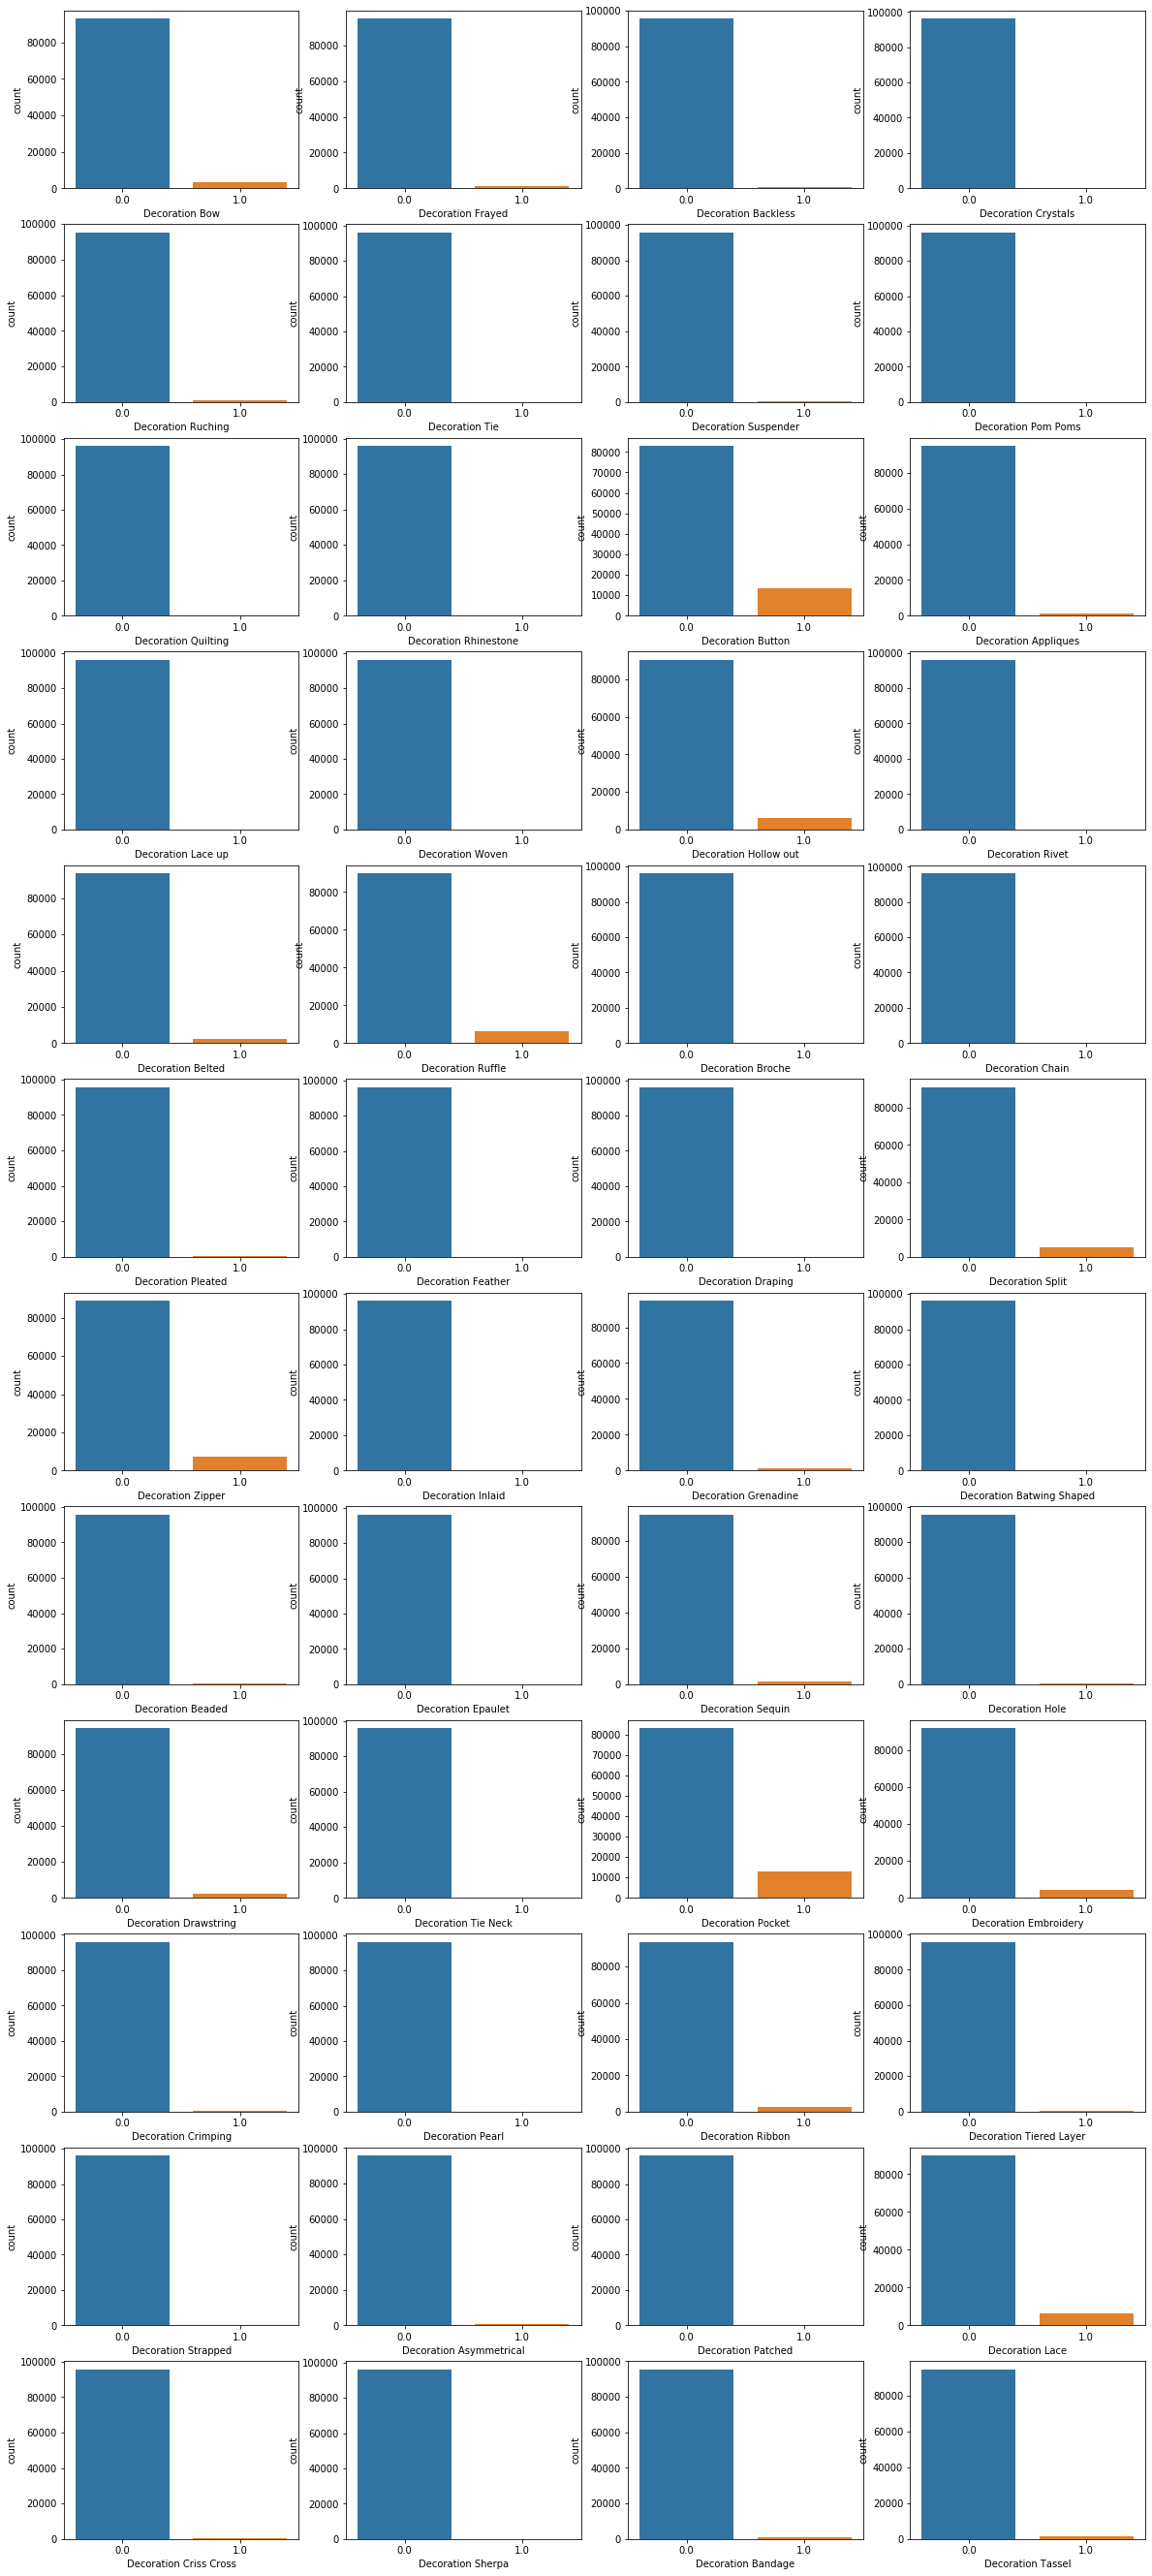

In [81]:
group = feature_groups.get(feature_group_names[2])
num_features = len(group)
rows = int(np.ceil(num_features/4))
cols = 4
fig, ax = plt.subplots(rows,cols, figsize=(20,rows*4))
k = 0
features = sorted(training_df.columns)
for i in range(rows):
    for j in range(cols):
        #ax[i,j].set_title(f"{features[k]}")
        #ax[i,j].legend()
        sns.countplot(x=group[k], data=training_df, ax=ax[i,j])
        k +=1
        
    